<a href="https://colab.research.google.com/github/Nazmul92/Deep-Learning-using-Tensorflow-and-Keras/blob/main/VGG16_for_skin_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dermnet_Dataset.zip to dermnet_Dataset.zip


In [ ]:
!unzip dermnet_Dataset.zip

Archive:  dermnet_Dataset.zip
   creating: dermnet_Dataset/test_dataset/
   creating: dermnet_Dataset/test_dataset/acne/
  inflating: dermnet_Dataset/test_dataset/acne/141__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpg  
  inflating: dermnet_Dataset/test_dataset/acne/142__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpg  
  inflating: dermnet_Dataset/test_dataset/acne/149__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpg  
  inflating: dermnet_Dataset/test_dataset/acne/160__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpg  
  inflating: dermnet_Dataset/test_dataset/acne/165__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpg  
  inflating: dermnet_Dataset/test_dataset/acne/169__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsInkiLDg1XQ.jpg  
  inflating: dermnet_Dataset/test_dataset/acne/171__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpg  
  inflating: dermnet_Dataset/test_dataset/acne/173__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsInki

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
train_dataset=train_datagen.flow_from_directory( 'dermnet_Dataset/train_dataset', 
        target_size=(150, 150), 
        batch_size=20,
        class_mode='categorical')  
train_dataset.class_indices

Found 568 images belonging to 4 classes.


{'acne': 0, 'eczema': 1, 'psoriasis': 2, 'rosacea': 3}

In [ ]:
validation=ImageDataGenerator(rescale=1./255)
test=ImageDataGenerator(rescale=1./255)
test_dataset=test.flow_from_directory('dermnet_Dataset/test_dataset', 
        target_size=(150, 150), 
        batch_size=20,
        class_mode='categorical')  
validation_dataset=validation.flow_from_directory(
       'dermnet_Dataset/validation_dataset',
        target_size=(150, 150),
        batch_size=20)

X_train,y_train=train_dataset.next()
X_test,y_test=validation_dataset.next()

Found 174 images belonging to 4 classes.
Found 157 images belonging to 4 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(150,150,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4, activation="softmax"))

In [ ]:
import keras
from keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=.001),
              metrics=['accuracy'])

In [ ]:
model_fit=model.fit(train_dataset,
                   steps_per_epoch=10,
                   epochs=500,
                   validation_data=validation_dataset)

Epoch 1/500
10/10 [==============================] - 43s 695ms/step - loss: 2.9709 - accuracy: 0.2941 - val_loss: 1.3273 - val_accuracy: 0.2484
Epoch 2/500
10/10 [==============================] - 2s 228ms/step - loss: 1.2508 - accuracy: 0.3692 - val_loss: 1.2794 - val_accuracy: 0.4076
Epoch 3/500
10/10 [==============================] - 2s 232ms/step - loss: 1.2567 - accuracy: 0.3563 - val_loss: 1.2953 - val_accuracy: 0.2484
Epoch 4/500
10/10 [==============================] - 2s 226ms/step - loss: 1.2144 - accuracy: 0.3449 - val_loss: 1.2897 - val_accuracy: 0.2484
Epoch 5/500
10/10 [==============================] - 2s 225ms/step - loss: 1.2855 - accuracy: 0.3099 - val_loss: 1.2681 - val_accuracy: 0.2803
Epoch 6/500
10/10 [==============================] - 2s 227ms/step - loss: 1.2482 - accuracy: 0.3271 - val_loss: 1.2809 - val_accuracy: 0.2484
Epoch 7/500
10/10 [==============================] - 2s 228ms/step - loss: 1.2437 - accuracy: 0.3589 - val_loss: 1.2896 - val_accuracy: 0.248

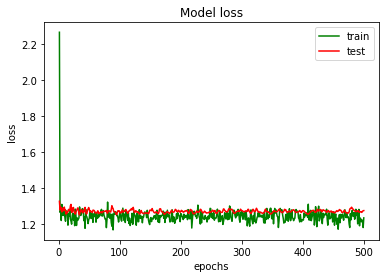

In [ ]:
import matplotlib.pyplot as plt
loss=model_fit.history['loss']
val_loss=model_fit.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'g')
plt.plot(epochs,val_loss,'r')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'], loc='upper right')
plt.show()

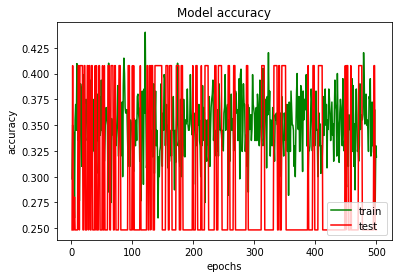

In [ ]:
acc=model_fit.history['accuracy']
val_acc=model_fit.history['val_accuracy']
plt.plot(epochs,acc,'g')
plt.plot(epochs,val_acc,'r')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'], loc='lower right')
plt.show()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

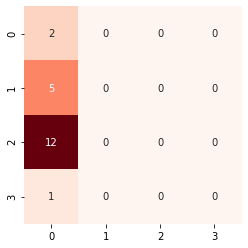

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, square=True, annot=True, cbar=False, cmap=plt.cm.Reds)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 37, 37, 256)       2

In [ ]:
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.10      1.00      0.18         2
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00         1

    accuracy                           0.10        20
   macro avg       0.03      0.25      0.05        20
weighted avg       0.01      0.10      0.02        20



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
